# Final report code

## *Importing libraries*

In [263]:
import gzip
import json
import string
import re
import seaborn as sns
import matplotlib as plt
import statsmodels.formula.api as sm

import pandas as pd
import plotly

from collections import Counter
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer

## *Analyzing listings.csv*

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132]),
 [Text(0, 0, 'capitol heights'),
  Text(1, 0, 'evergreen park'),
  Text(2, 0, 'bedstuy'),
  Text(3, 0, 'longislandcity'),
  Text(4, 0, 'calumet park'),
  Text(5, 0, 'aurora'),
  Text(6, 0, 'lawrence'),
  Text(7, 0, 'hollis'),
  Text(8, 0, 'engle

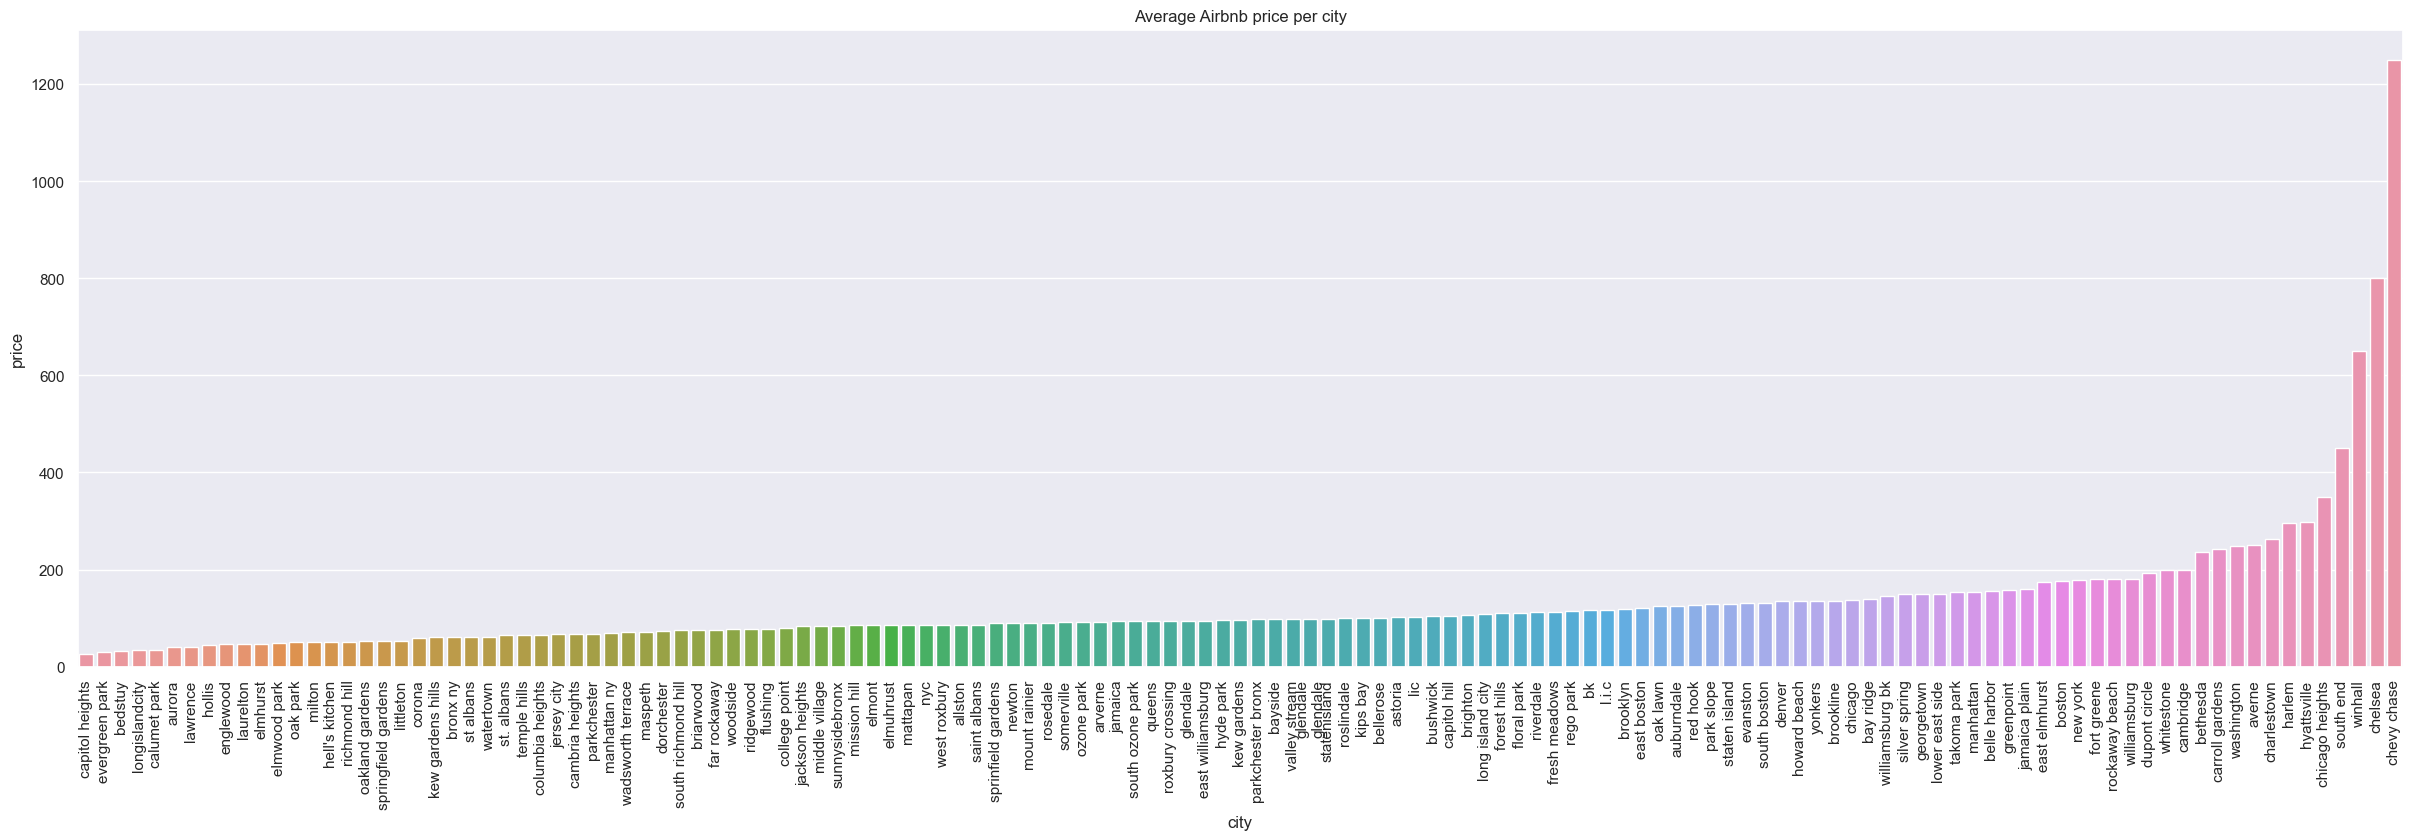

In [264]:
listingsDF = pd.read_csv("datasets/listings.csv")
listingsDF = listingsDF[listingsDF["price"].notna()]
listingsDF = listingsDF[listingsDF["price"].notnull()]
listingsDF2 = listingsDF.groupby(by="city").mean().reset_index().sort_values(by=["price"])
listingsDF3 = listingsDF2
sns.set(rc={'figure.figsize':(30,8.27)})
sns.barplot(data=listingsDF2,x="city",y="price").set(title="Average Airbnb price per city")
plt.pyplot.xticks(rotation=90)

[Text(0.5, 1.0, 'Airbnb price for Chevy Chase')]

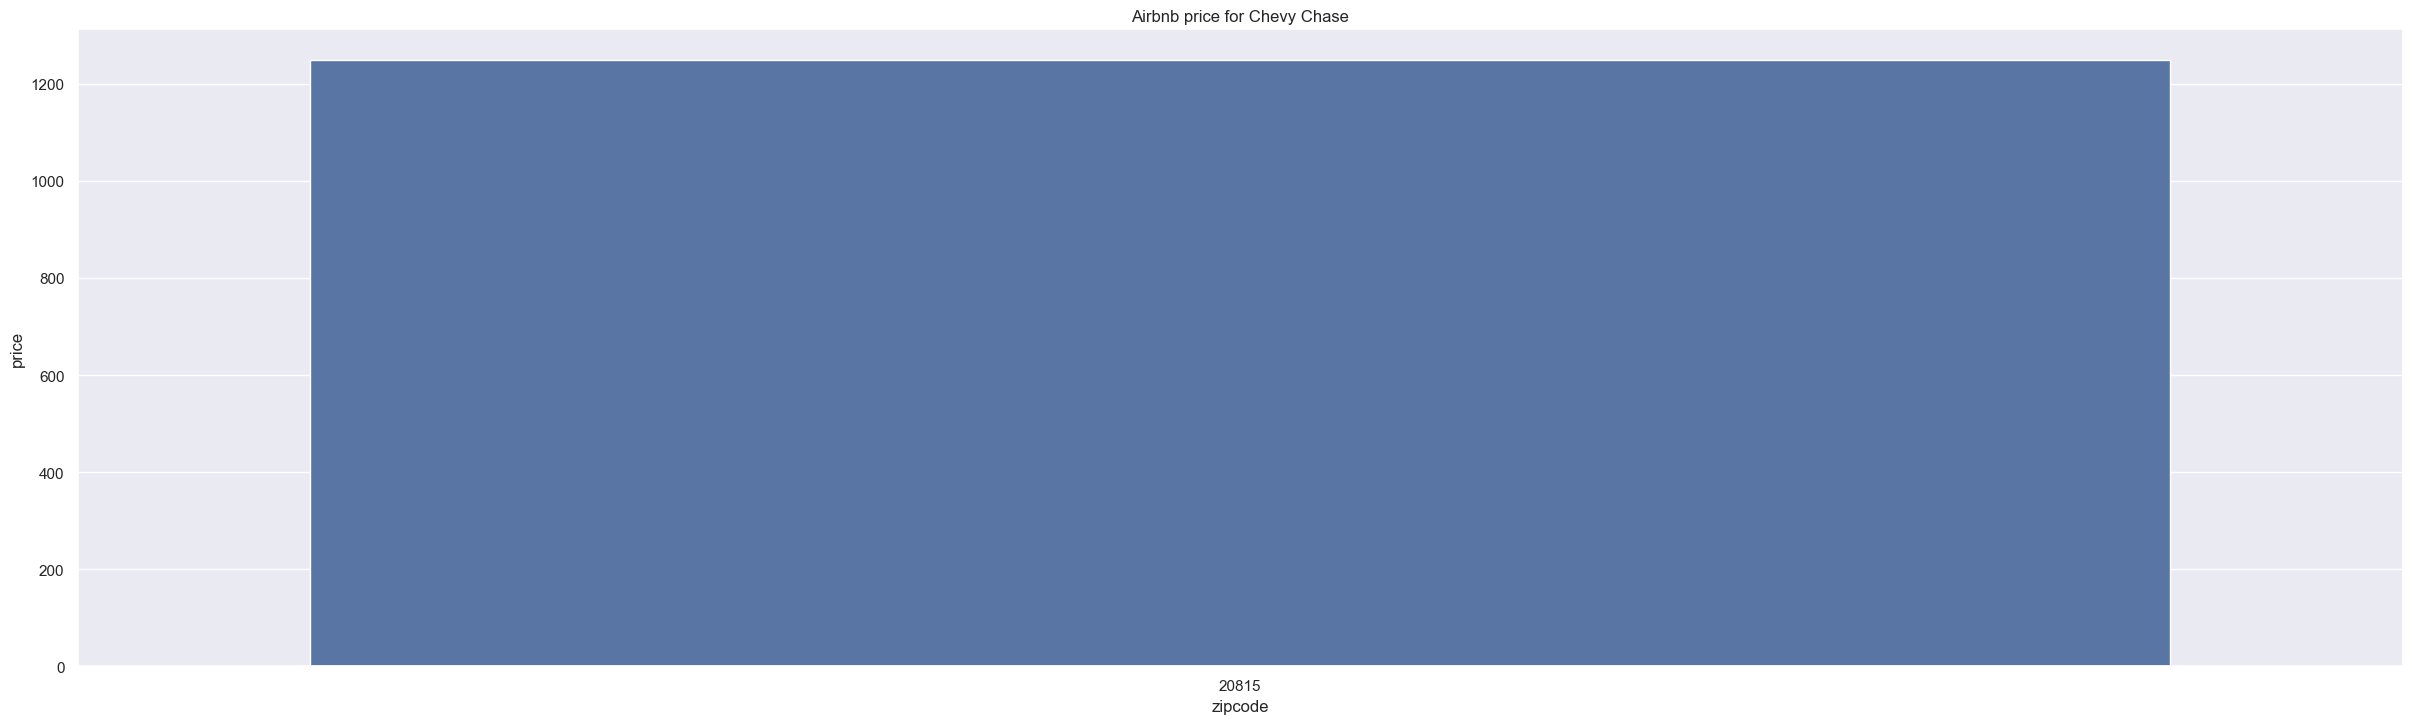

In [265]:
listingsDF = listingsDF[listingsDF["city"].notna()]
listingsDF = listingsDF[listingsDF["city"].notnull()]
listingsDF2 = listingsDF[listingsDF['city'].str.contains("chevy chase")]
sns.barplot(data=listingsDF2,x="zipcode",y="price").set(title="Airbnb price for Chevy Chase")

       accommodates                                          amenities  \
53177           2.0  {TV,Internet,"Wireless Internet","Air conditio...   
54489           4.0  {Internet,"Wireless Internet","Air conditionin...   
54496           2.0  {Internet,"Wireless Internet","Air conditionin...   
54501           1.0  {Internet,"Wireless Internet","Air conditionin...   
54512           1.0  {Internet,"Wireless Internet","Air conditionin...   
54523           1.0  {Internet,"Wireless Internet","Air conditionin...   
54524           1.0  {Internet,"Wireless Internet","Air conditionin...   
54537          11.0  {"Wireless Internet","Air conditioning","Free ...   
54538           1.0  {Internet,"Wireless Internet","Air conditionin...   
54540           2.0  {Internet,"Wireless Internet","Air conditionin...   
59823           2.0  {TV,Internet,"Wireless Internet","Air conditio...   

       availability_30  bathrooms  bed_type  bedrooms  beds  \
53177               30        1.0    Airbed     

[Text(0.5, 1.0, 'Airbnb price for Capitol Heights')]

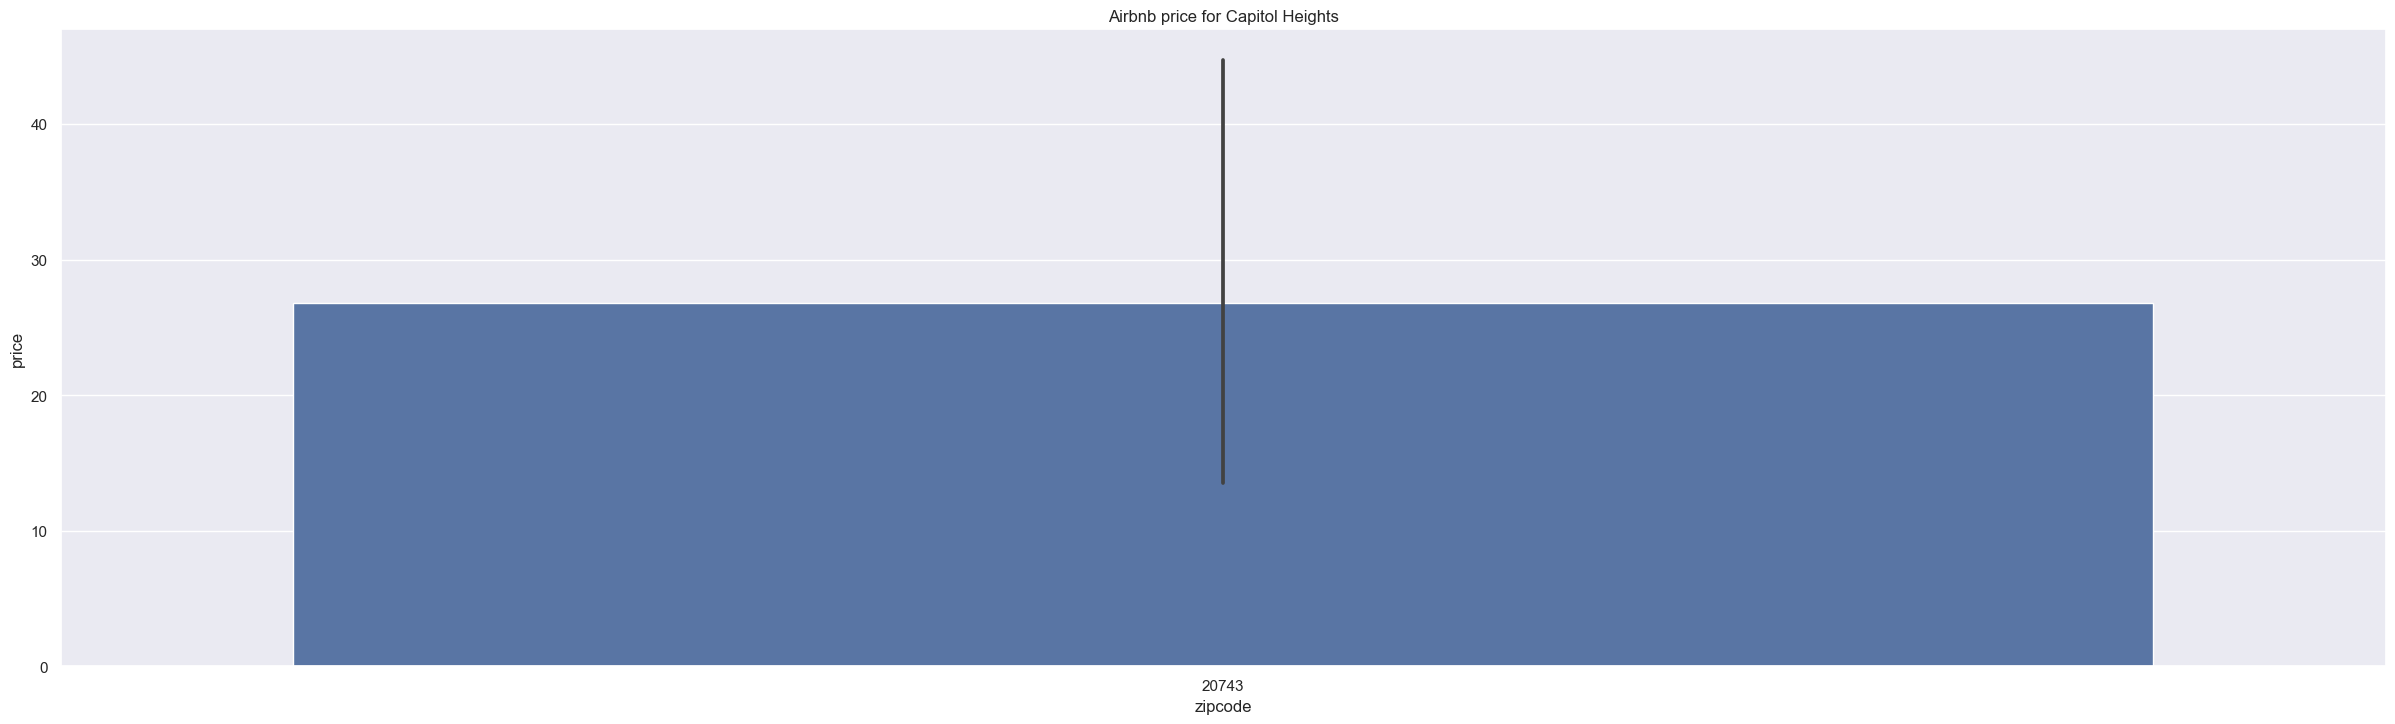

In [266]:
listingsDF2 = listingsDF[listingsDF['city'].str.contains("capitol heights")]
print(listingsDF2)
sns.barplot(data=listingsDF2,x="zipcode",y="price").set(title="Airbnb price for Capitol Heights")

## *Analyzing demographics.csv*

C:\Users\David\AppData\Local\Temp\ipykernel_10776\2601041499.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingsDF2["zipcode"] = listingsDF2["zipcode"].astype(int)
C:\Users\David\AppData\Local\Temp\ipykernel_10776\2601041499.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographicsDF2["mean_household_income"] = demographicsDF2["mean_household_income"].astype(int)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 [Text(0, 0, 'bronx ny'),
  Text(1, 0, 'calumet park'),
  Text(2, 0, 'bedstuy'),
  Text(3, 0, 'mission hill'),
  Text(4, 0, 'roxbury crossing'),
  Text(5, 0, 'sunnysidebronx'),
  Text(6, 0, 'chicago heights'),
  Text(7, 0, 'mattapan'),
  Text(8, 0, 'corona'),
  Text(9, 0, 'far rockaway'),
  Text(10, 0, 'parkchester'),
  Text(11, 0, 'parkchester

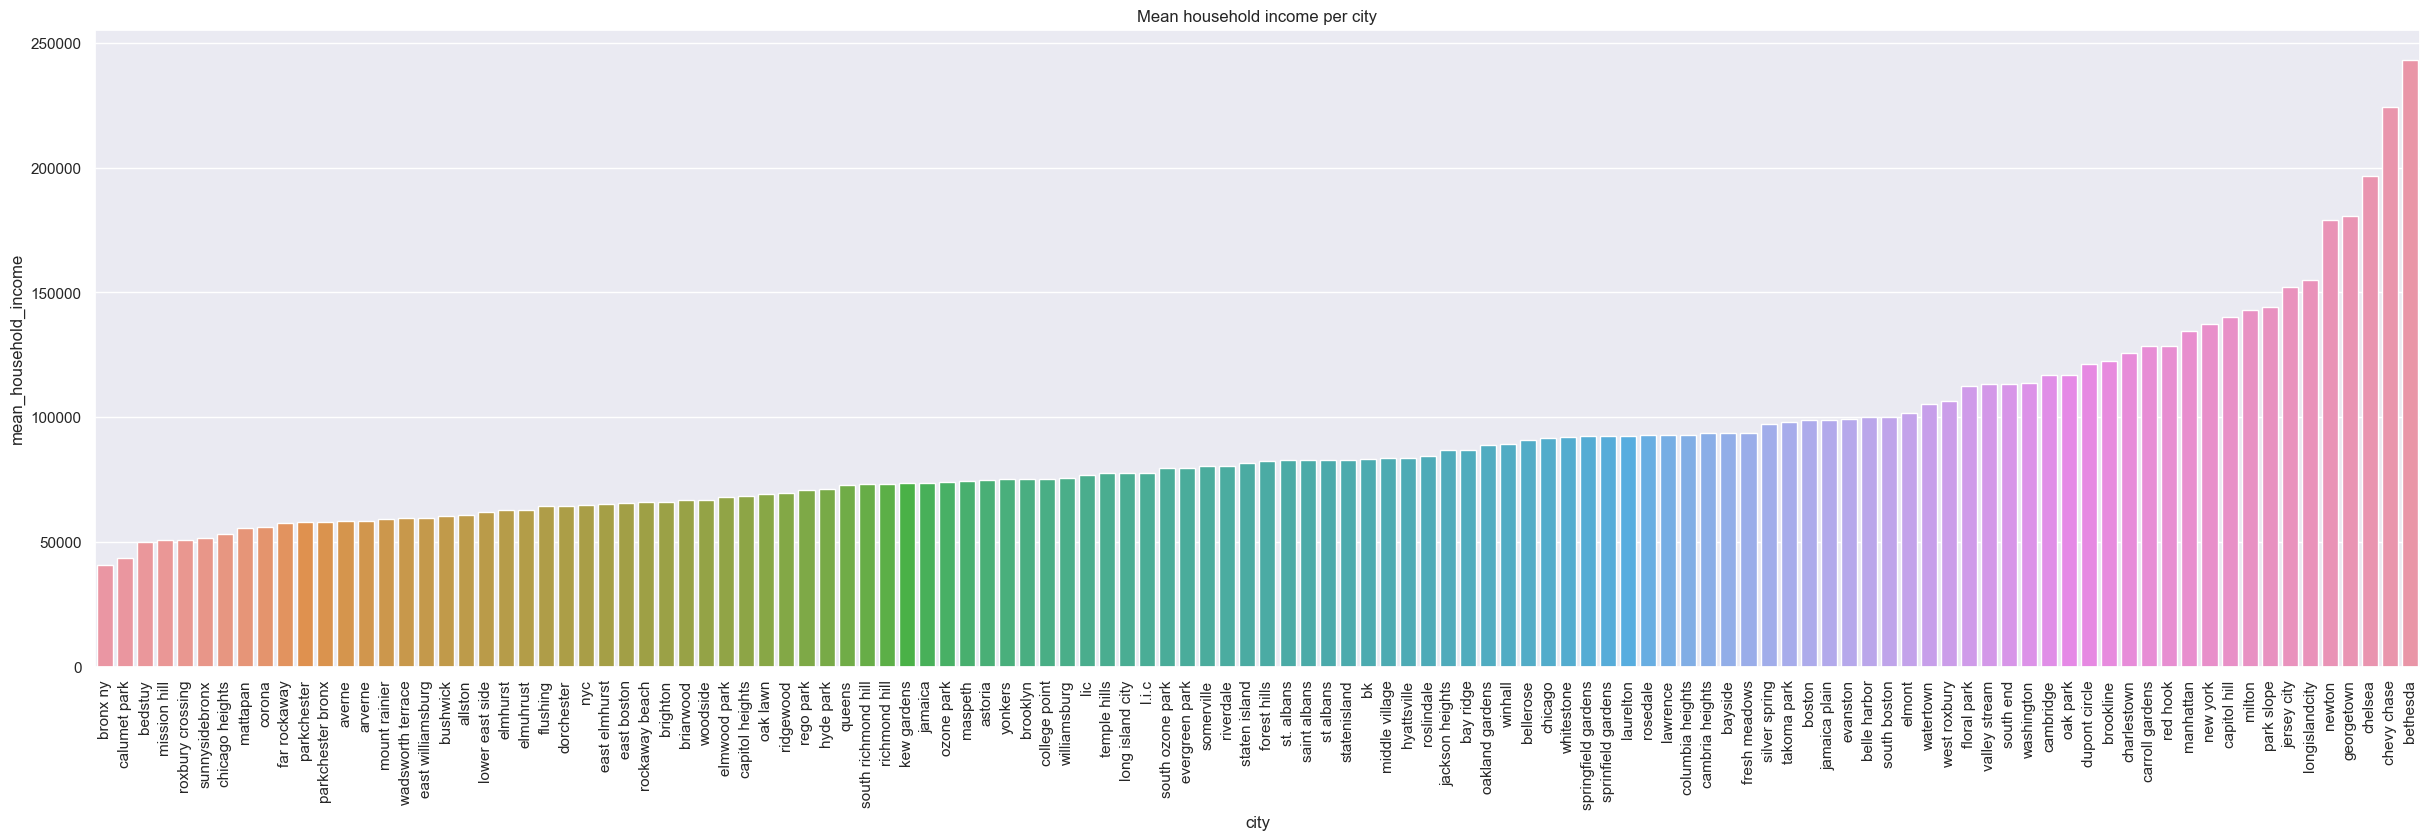

In [267]:
demographicsDF = pd.read_csv("datasets/demographics.csv")
demographicsDF3 = demographicsDF
realEstateDF = pd.read_csv("datasets/real_estate.csv.gz",compression='gzip')
realEstateDF = realEstateDF[["zipcode","city"]]
listingsDF = listingsDF[listingsDF["zipcode"].notna()]
listingsDF = listingsDF[listingsDF["zipcode"].notnull()]
listingsDF = listingsDF[listingsDF["zipcode"].str.isnumeric()]
listingsDF2 = listingsDF[["city","zipcode"]]
listingsDF2["zipcode"] = listingsDF2["zipcode"].astype(int)

demographicsDF = demographicsDF.merge(listingsDF2,on=['zipcode'])
demographicsDF = demographicsDF[demographicsDF["mean_household_income"].str.isnumeric()]
demographicsDF = demographicsDF[demographicsDF["city"].isin(list(listingsDF2["city"]))]

demographicsDF2 = demographicsDF[["city","mean_household_income"]]
demographicsDF2["mean_household_income"] = demographicsDF2["mean_household_income"].astype(int)
demographicsDF2 = demographicsDF2.groupby(by="city").mean().sort_values(by=["mean_household_income"]).reset_index()
demographicsDF4 = demographicsDF2

sns.set(rc={'figure.figsize':(30,8.27)})
sns.barplot(data=demographicsDF2,x="city",y="mean_household_income").set(title="Mean household income per city")
plt.pyplot.xticks(rotation=90)


C:\Users\David\AppData\Local\Temp\ipykernel_10776\3164617871.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographicsDF2["median_household_income"] = demographicsDF2["median_household_income"].astype(int)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 [Text(0, 0, 'bronx ny'),
  Text(1, 0, 'roxbury crossing'),
  Text(2, 0, 'mission hill'),
  Text(3, 0, 'calumet park'),
  Text(4, 0, 'lower east side'),
  Text(5, 0, 'bedstuy'),
  Text(6, 0, 'sunnysidebronx'),
  Text(7, 0, 'chicago heights'),
  Text(8, 0, 'nyc'),
  Text(9, 0, 'arverne'),
  Text(10, 0, 'averne'),
  Text(11, 0, 'east williamsburg

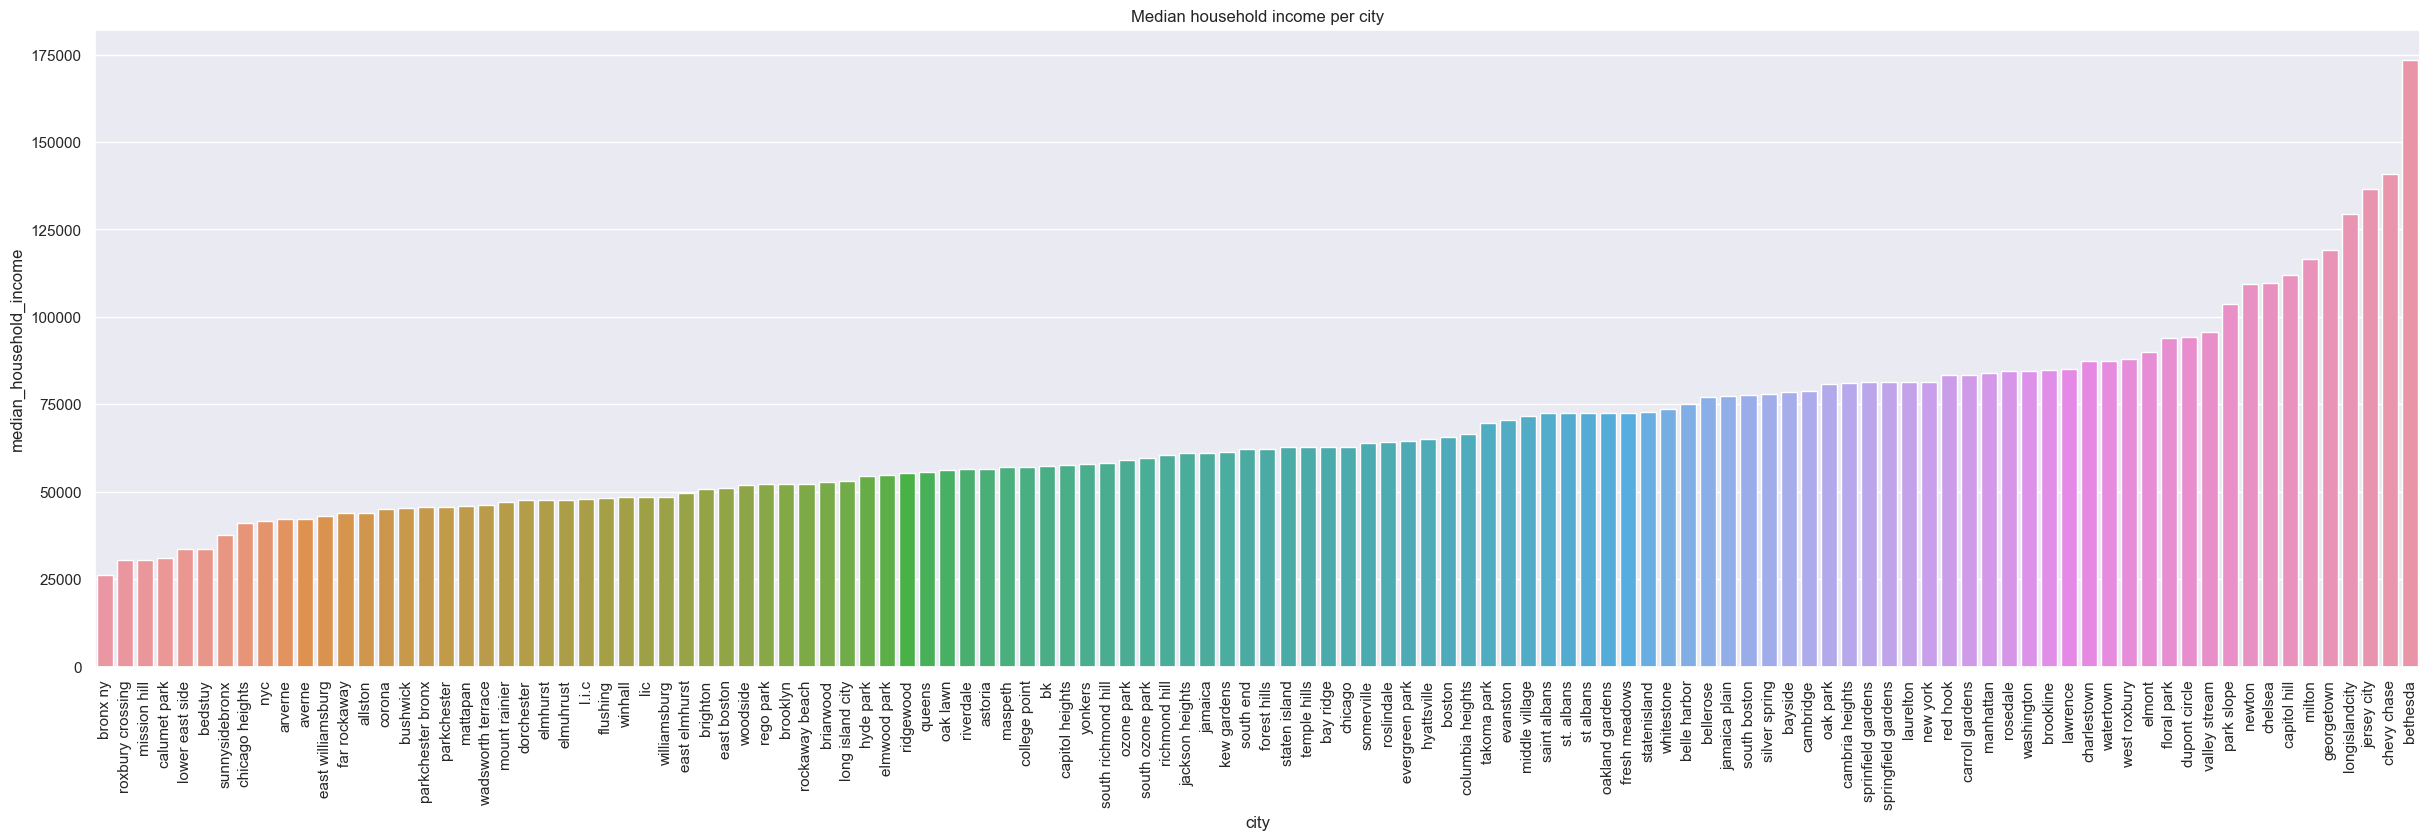

In [268]:
demographicsDF = demographicsDF3

demographicsDF = demographicsDF.merge(listingsDF2,on=['zipcode'])
demographicsDF = demographicsDF[demographicsDF["median_household_income"].str.isnumeric()]
demographicsDF = demographicsDF[demographicsDF["city"].isin(list(listingsDF2["city"]))]

demographicsDF2 = demographicsDF[["city","median_household_income"]]
demographicsDF2["median_household_income"] = demographicsDF2["median_household_income"].astype(int)
demographicsDF2 = demographicsDF2.groupby(by="city").mean().sort_values(by=["median_household_income"]).reset_index()

sns.set(rc={'figure.figsize':(30,8.27)})
sns.barplot(data=demographicsDF2,x="city",y="median_household_income").set(title="Median household income per city")
plt.pyplot.xticks(rotation=90)

## *Analyzing econ_state.csv*

In [269]:
econstateDF = pd.read_csv("datasets/econ_state.csv")

westCoastStates = "CA", "WA", "OR"

#econstateDF = econstateDF[econstateDF["state"].isin(westCoastStates)]

econstateDF = econstateDF.drop(list(econstateDF.filter(regex='gdp')),axis=1)
econstateDF = econstateDF.drop(list(econstateDF.filter(regex='ur')),axis=1)

econstateDF = econstateDF.drop(list(econstateDF.filter(regex='19')),axis=1)
econstateDF = econstateDF.drop(list(econstateDF.filter(regex='200')),axis=1)
econstateDF = econstateDF.drop(list(econstateDF.filter(regex='2010')),axis=1)
econstateDF = econstateDF.drop(list(econstateDF.filter(regex='2016')),axis=1)

econstateColumnNames = [i for i in econstateDF.columns if 'personal_income' in i]

econstateDF[econstateColumnNames] = econstateDF[econstateColumnNames].astype(int)

econstateDF["avg_personal_income"] = econstateDF[econstateColumnNames].mean(axis=1)

econstateDF = econstateDF.sort_values(by=["avg_personal_income"])

econstateDF

,state,2011Q1_personal_income,2011Q2_personal_income,2011Q3_personal_income,2011Q4_personal_income,2012Q1_personal_income,2012Q2_personal_income,2012Q3_personal_income,2012Q4_personal_income,2013Q1_personal_income,...,2013Q4_personal_income,2014Q1_personal_income,2014Q2_personal_income,2014Q3_personal_income,2014Q4_personal_income,2015Q1_personal_income,2015Q2_personal_income,2015Q3_personal_income,2015Q4_personal_income,avg_personal_income
45,VT,26732676,27111832,27352416,27683592,27715568,28094068,27977924,28694120,28261516,...,28885188,28956180,29340276,29771452,30126428,29962512,30306496,30642244,30759004,2.877986e+07
50,WY,27535241,27830620,28280655,28722484,29469972,30271656,30211556,31786124,30554388,...,31092200,31841464,32660344,33118968,33273572,32855276,33002104,33156200,32464620,3.096761e+07
41,SD,36273332,36497068,36885536,37510056,37663080,37893824,36286084,38492288,37944004,...,37430952,38651864,39391748,39301560,39546768,40334928,40953044,41465096,41663880,3.848233e+07
1,AK,36119663,36964076,37489045,38032852,38155492,38485332,38452884,38869088,37732772,...,38201904,39446728,40046564,40451232,40971968,41339300,41527308,41460148,41516228,3.904960e+07
34,ND,32038941,32700604,33741827,34744880,37461660,38772972,39676668,41885536,39461892,...,40636448,41655084,42998196,43212032,43528112,42711108,42366144,42330044,41991456,3.965005e+07
26,MT,36982218,37398728,37922454,38490512,39406944,39711548,39916076,41075032,39862880,...,40238504,40708556,41452296,41794672,42215040,42632880,43113640,43544012,43457180,4.050593e+07
7,DE,39167539,39526780,39991097,40064324,39103536,39895868,39727572,41088824,39971084,...,41032352,41628984,42172792,42695864,43039724,44201296,45011496,45349704,45669352,4.152991e+07
8,DC,39973894,40608476,41258142,41406924,41859124,42267856,42010372,43102132,42881924,...,43572680,45530956,46222396,46806288,47195648,48388508,49156072,49631224,49927864,4.440641e+07
39,RI,45935194,46788484,46904170,46934532,48072520,48444488,48474088,49414304,48366028,...,49179656,49846828,50275444,50924808,51594016,51885948,52718956,53183888,53545212,4.950150e+07
19,ME,51281186,51416856,51874378,52283668,52351756,52967264,52748012,53443396,52359052,...,53205020,53630244,54537208,55188844,56084472,55642896,56676204,57273352,57982760,5.381405e+07


## *Analyzing calendar.csv*

In [270]:
calendarDF = pd.read_csv("datasets/calendar.csv")

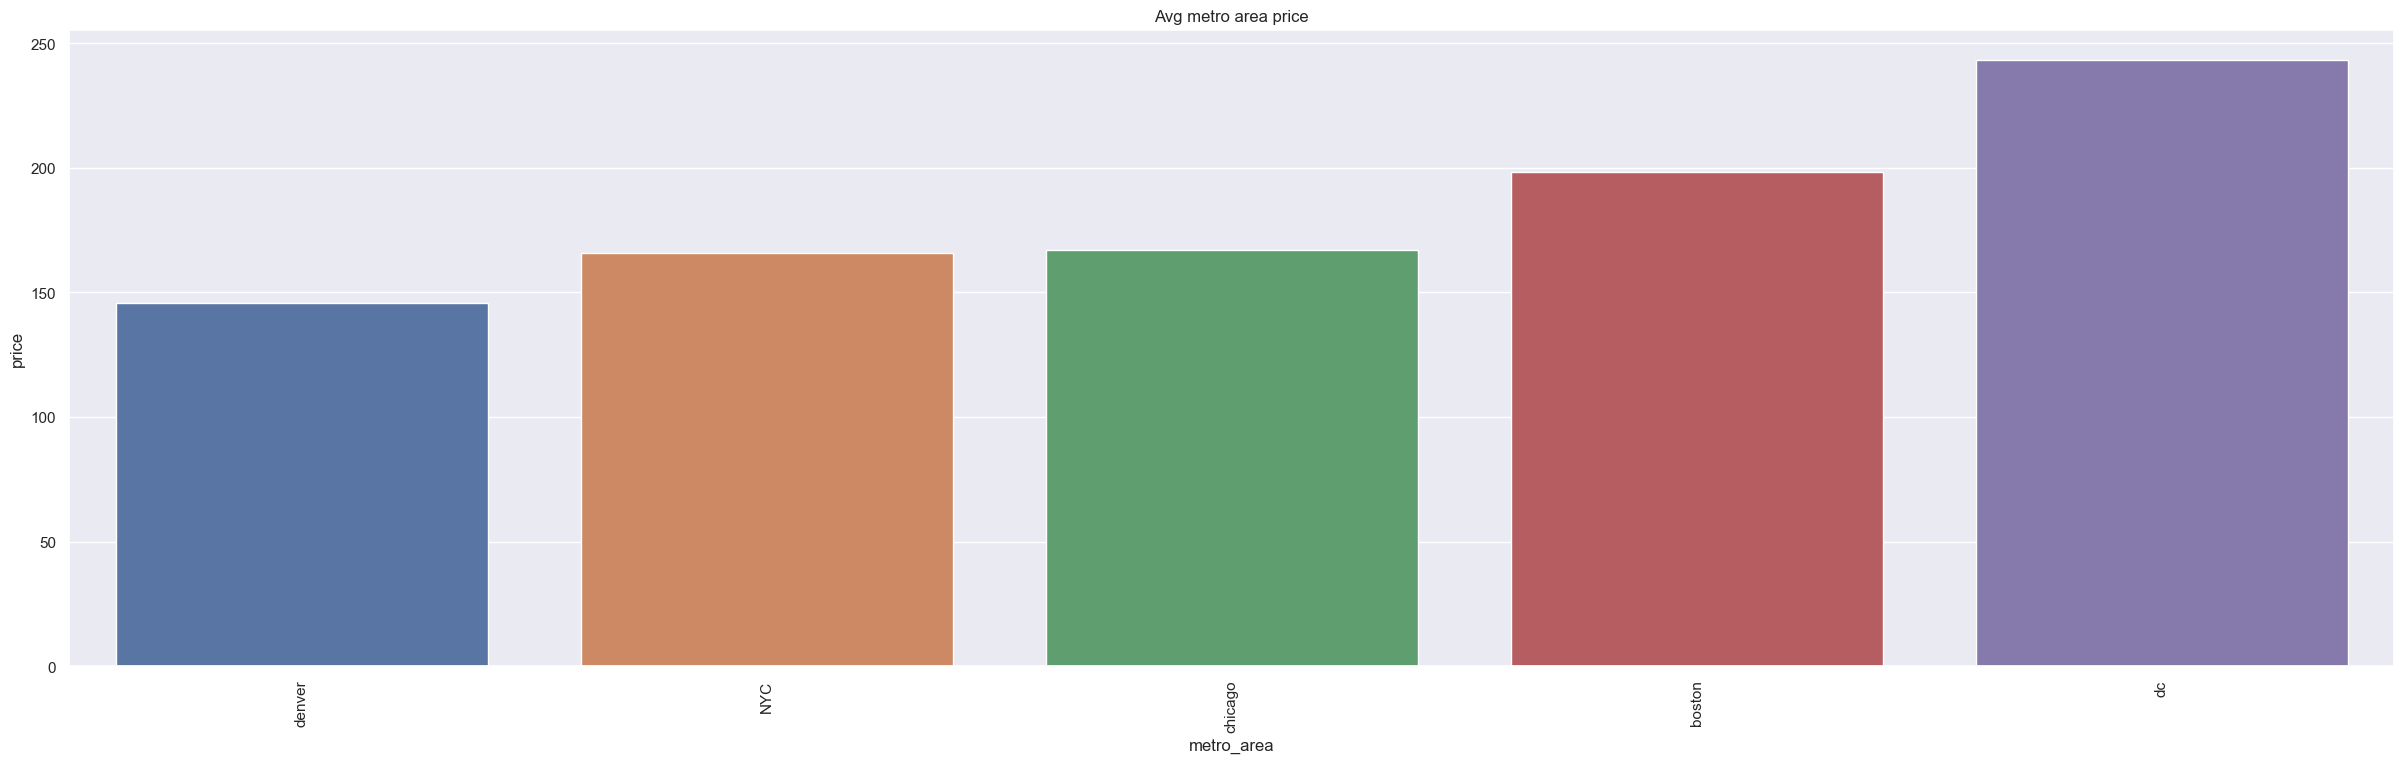

20000.0


<AxesSubplot:title={'center':'price'}, xlabel='metro_area'>

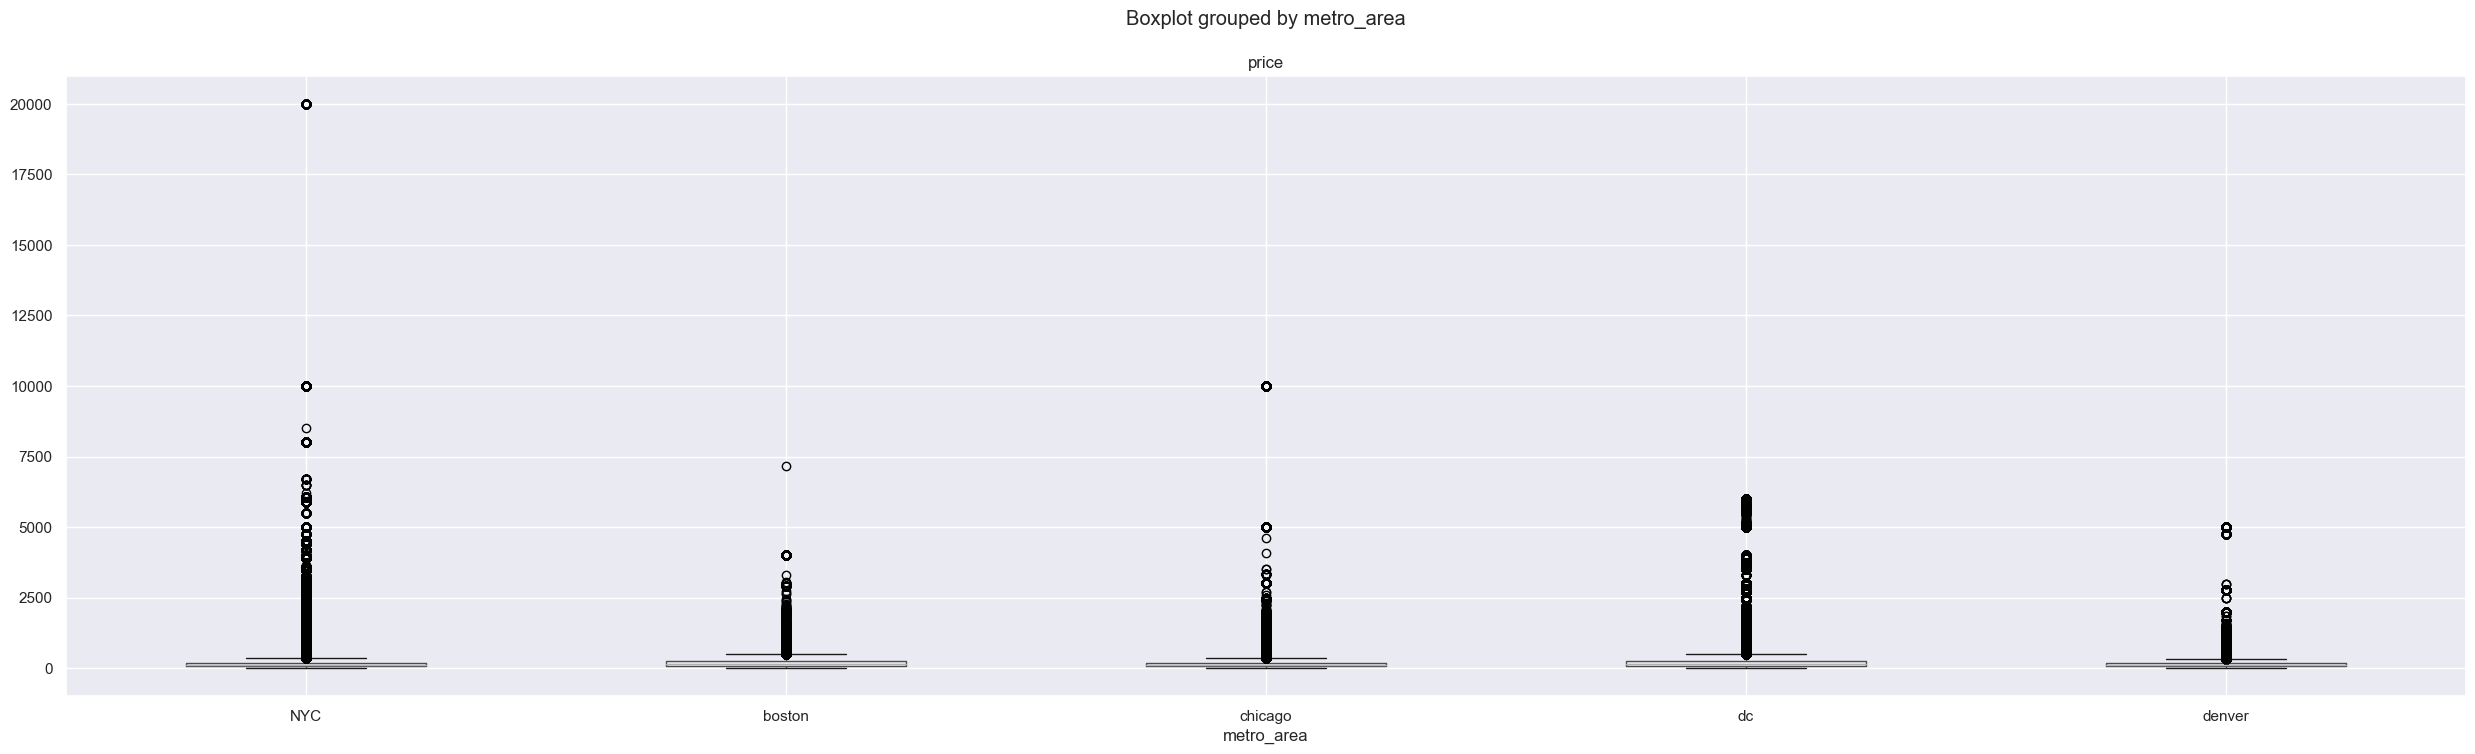

In [280]:
calendarDF = calendarDF.dropna()
calendarDF2 = calendarDF.groupby(by="metro_area").mean().reset_index().sort_values(by=["price"])
calendarDF2 = calendarDF2[["metro_area","price"]]
sns.barplot(data=calendarDF2,x="metro_area",y="price").set(title="Avg metro area price")
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()
print(calendarDF["price"].max())

calendarDF.boxplot(by="metro_area",column=['price'])

#sns.boxplot(x="metro_area",y="price",data=calendarDF)



## *Analyzing venues.csv*

(-74.1, -73.5, 40.55, 41.0)

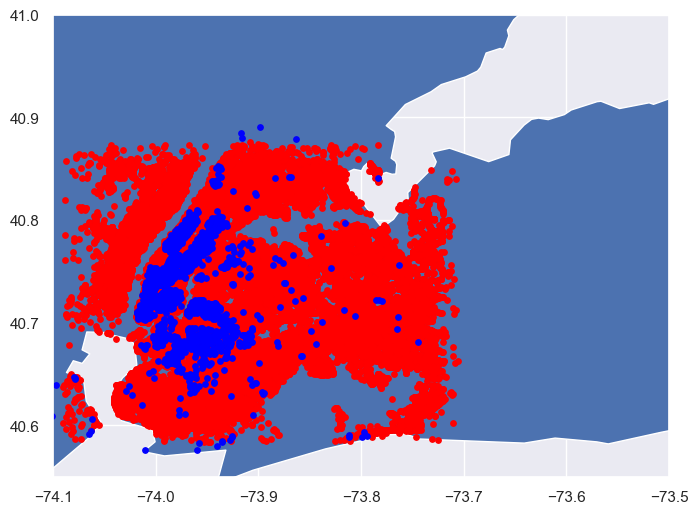

In [281]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

venuesDF = pd.read_csv("datasets/venues.csv.gz",compression="gzip")

listingsDF2 = listingsDF.sort_values(by=['price']).tail(5982)

geometry = [Point(xy) for xy in zip(venuesDF['longitude'], venuesDF['latitude'])]
gdf = GeoDataFrame(venuesDF, geometry=geometry)
geometry2 = [Point(xy) for xy in zip(listingsDF2['longitude'], listingsDF2['latitude'])]
gdf2 = GeoDataFrame(listingsDF2, geometry=geometry2)   


#this is a simple map that goes with geopandas
world = gpd.read_file('datasets/cb_2018_us_nation_5m.shp')
world = world.plot(figsize=(10, 6))
gdf.plot(ax=world, marker='o', color='red', markersize=15)
gdf2.plot(ax=world, marker='o', color='blue', markersize=15)

plt.pyplot.axis([-150, -50, 25, 50])

plt.pyplot.axis([-74.1, -73.5, 40.55, 41]) #x_min, x_max, y_min, y_max use this line for zooming using matplotlib, plotly with 300k points brings an i7 to its knees

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  metropolitan       price
0          NYC  145.308100
1       boston  173.925802
2      chicago  136.210486
3           dc  247.162835
4       denver  133.850699


C:\Users\David\AppData\Local\Temp\ipykernel_10776\2460258435.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numOfVenueTypeEachCity = numOfVenueTypeEachCity.append(words)


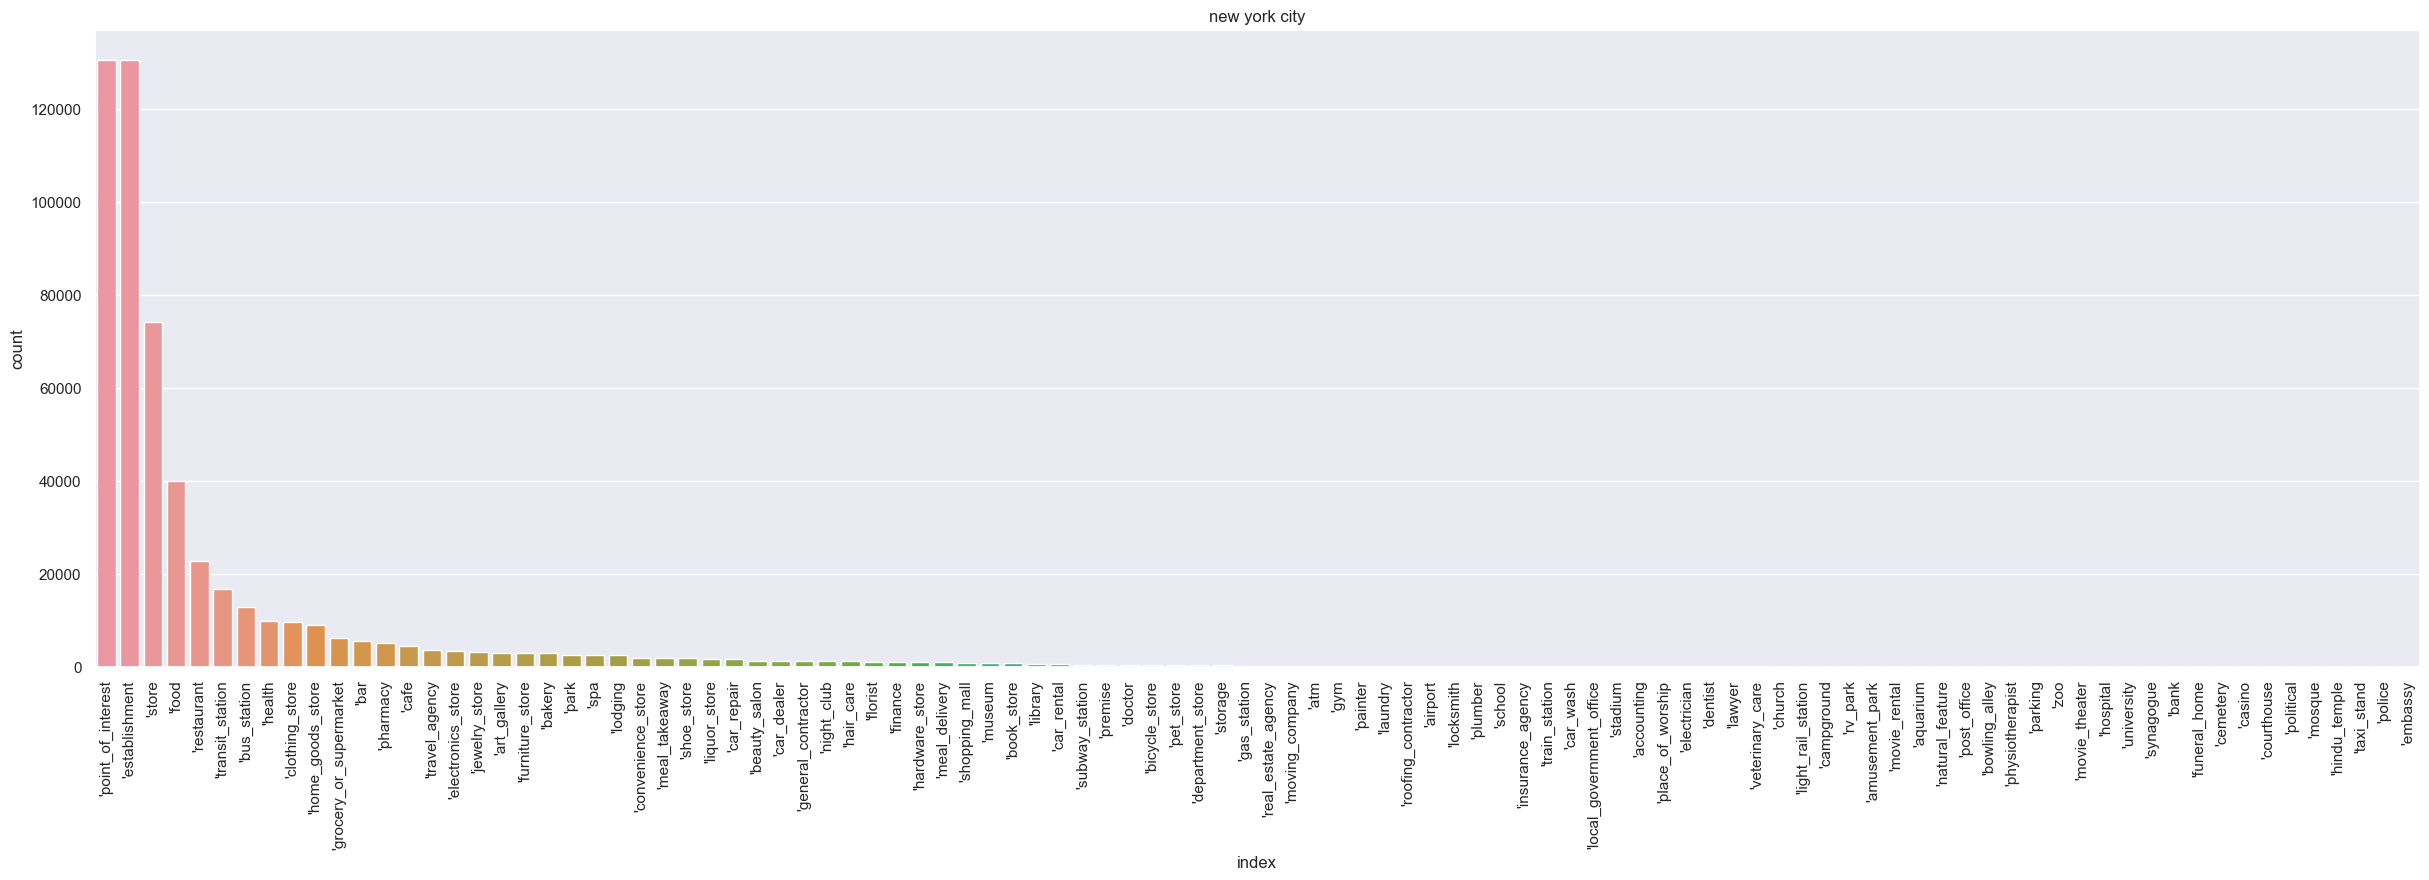

C:\Users\David\AppData\Local\Temp\ipykernel_10776\2460258435.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numOfVenueTypeEachCity = numOfVenueTypeEachCity.append(words)


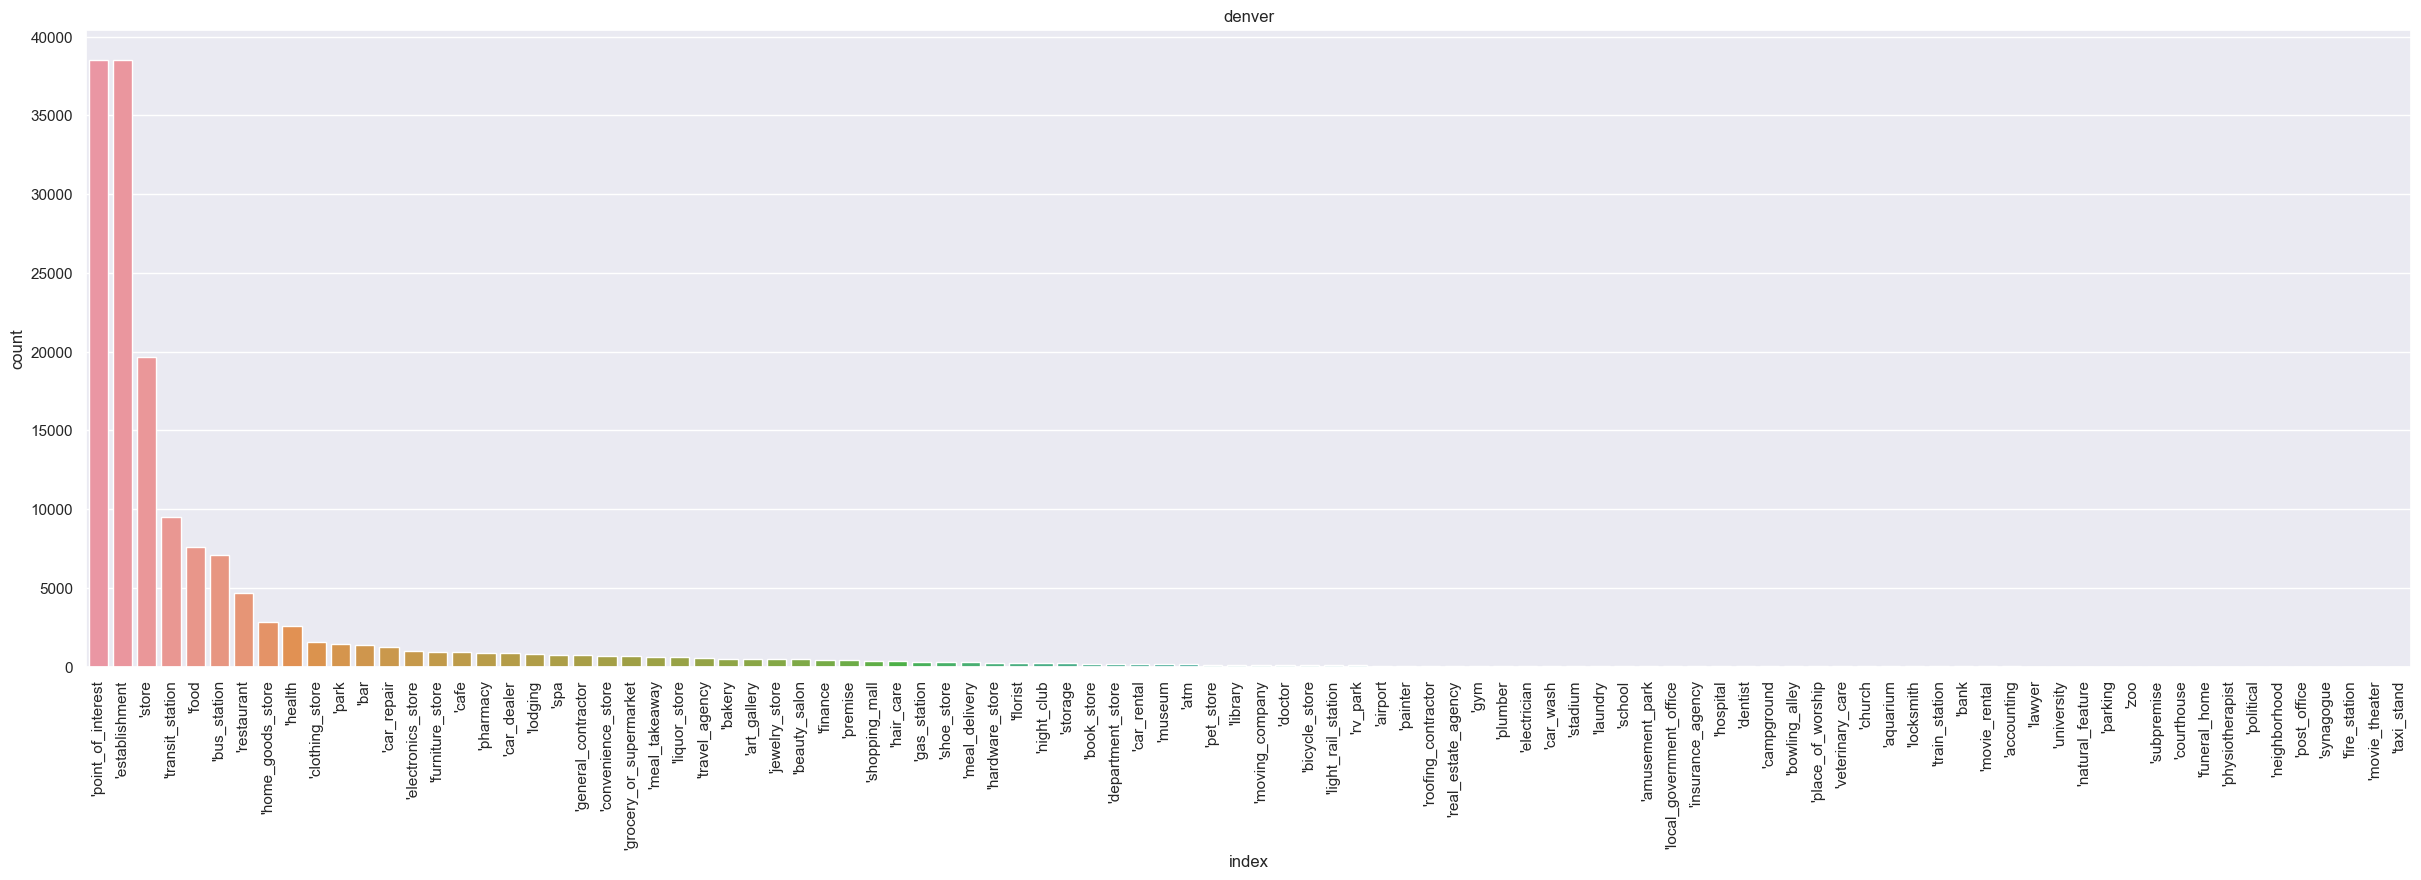

C:\Users\David\AppData\Local\Temp\ipykernel_10776\2460258435.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numOfVenueTypeEachCity = numOfVenueTypeEachCity.append(words)


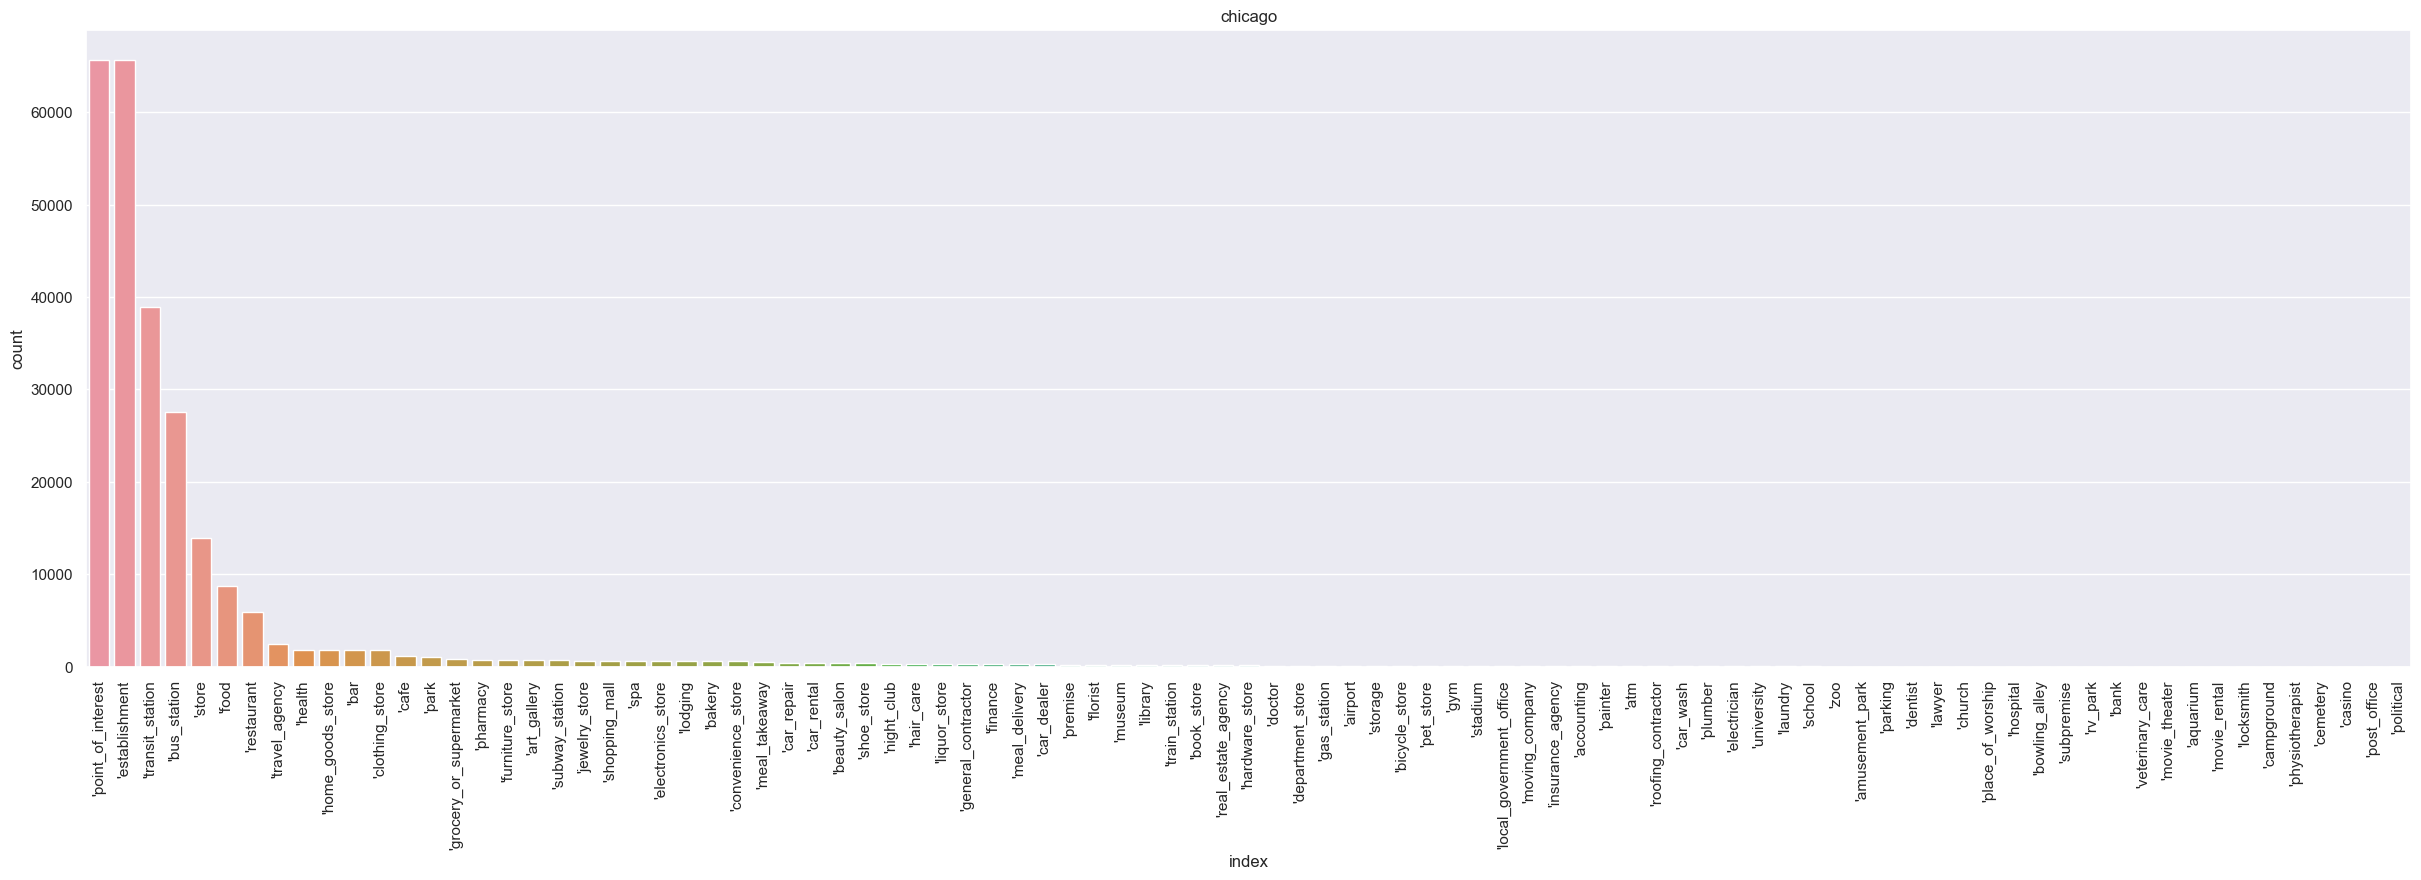

C:\Users\David\AppData\Local\Temp\ipykernel_10776\2460258435.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numOfVenueTypeEachCity = numOfVenueTypeEachCity.append(words)


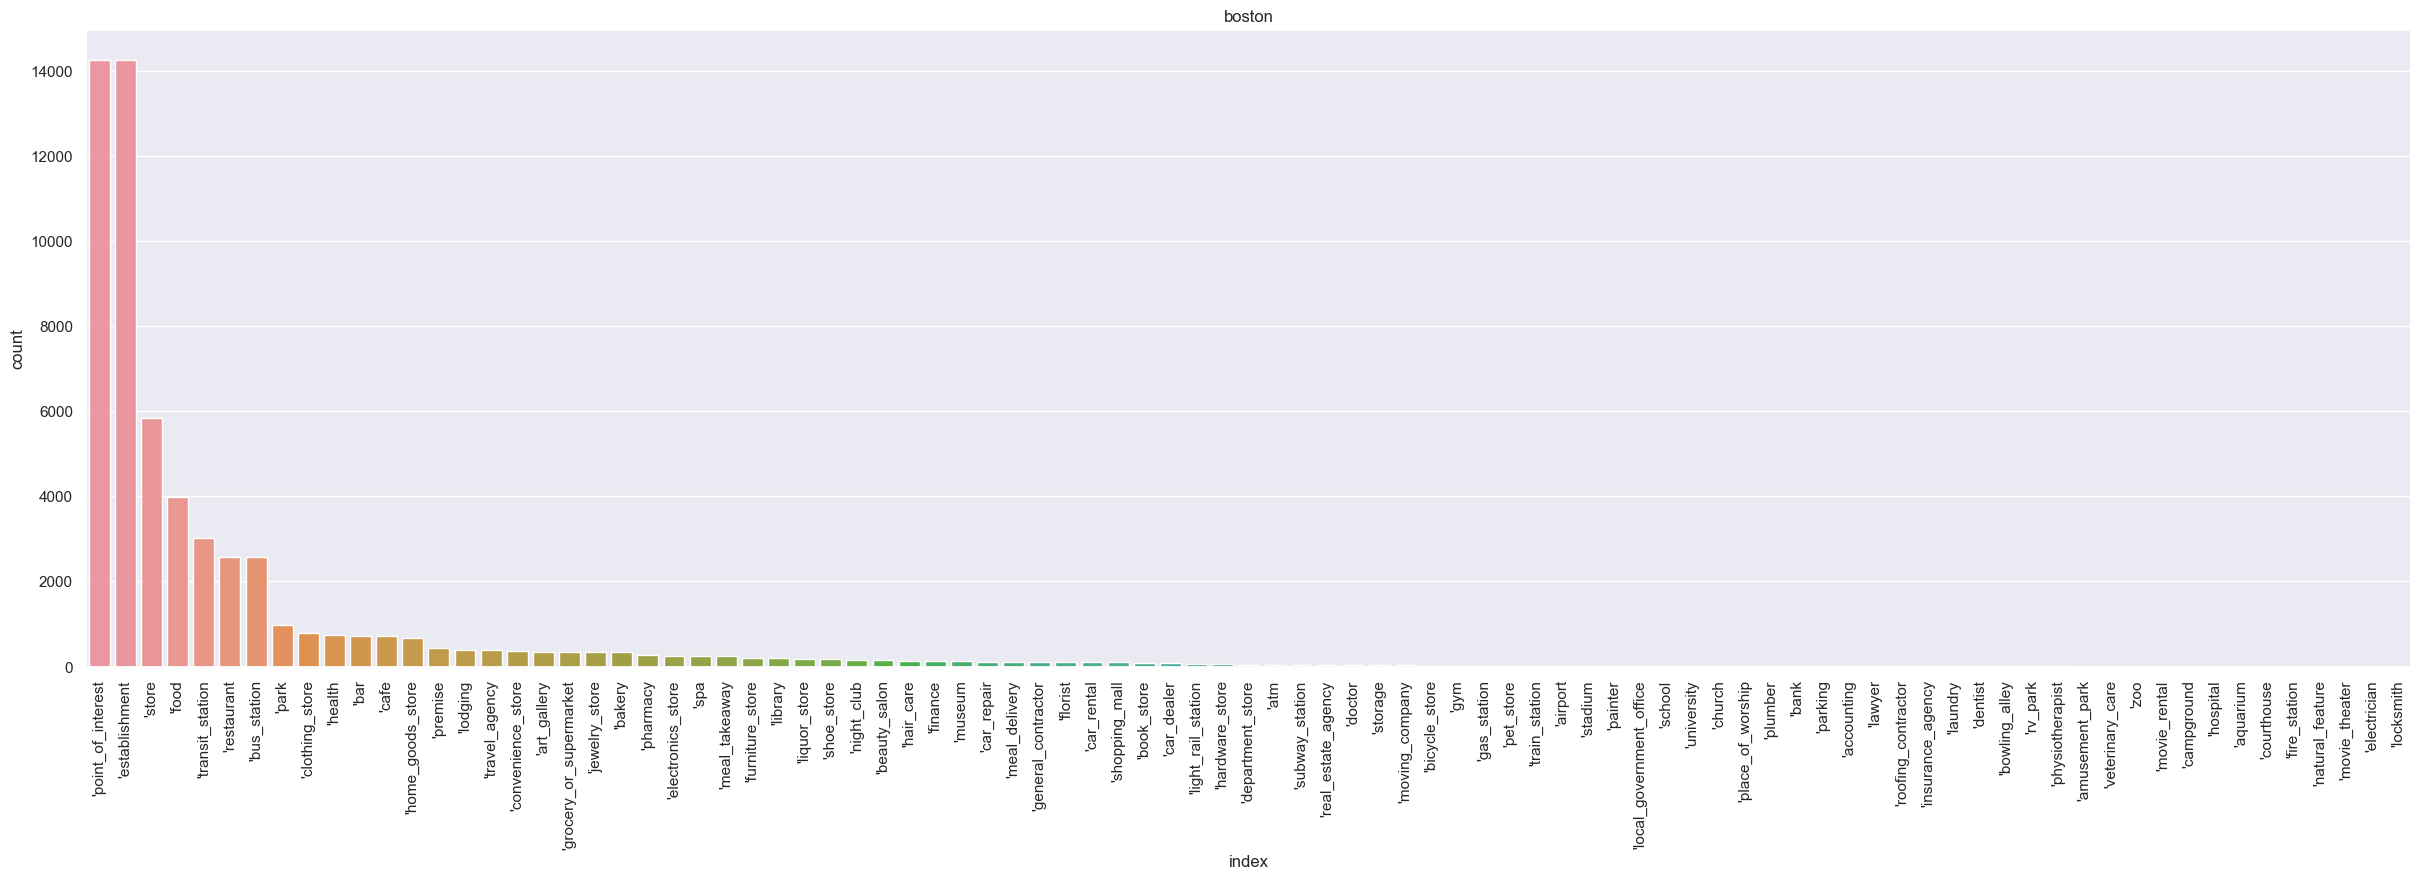

C:\Users\David\AppData\Local\Temp\ipykernel_10776\2460258435.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numOfVenueTypeEachCity = numOfVenueTypeEachCity.append(words)


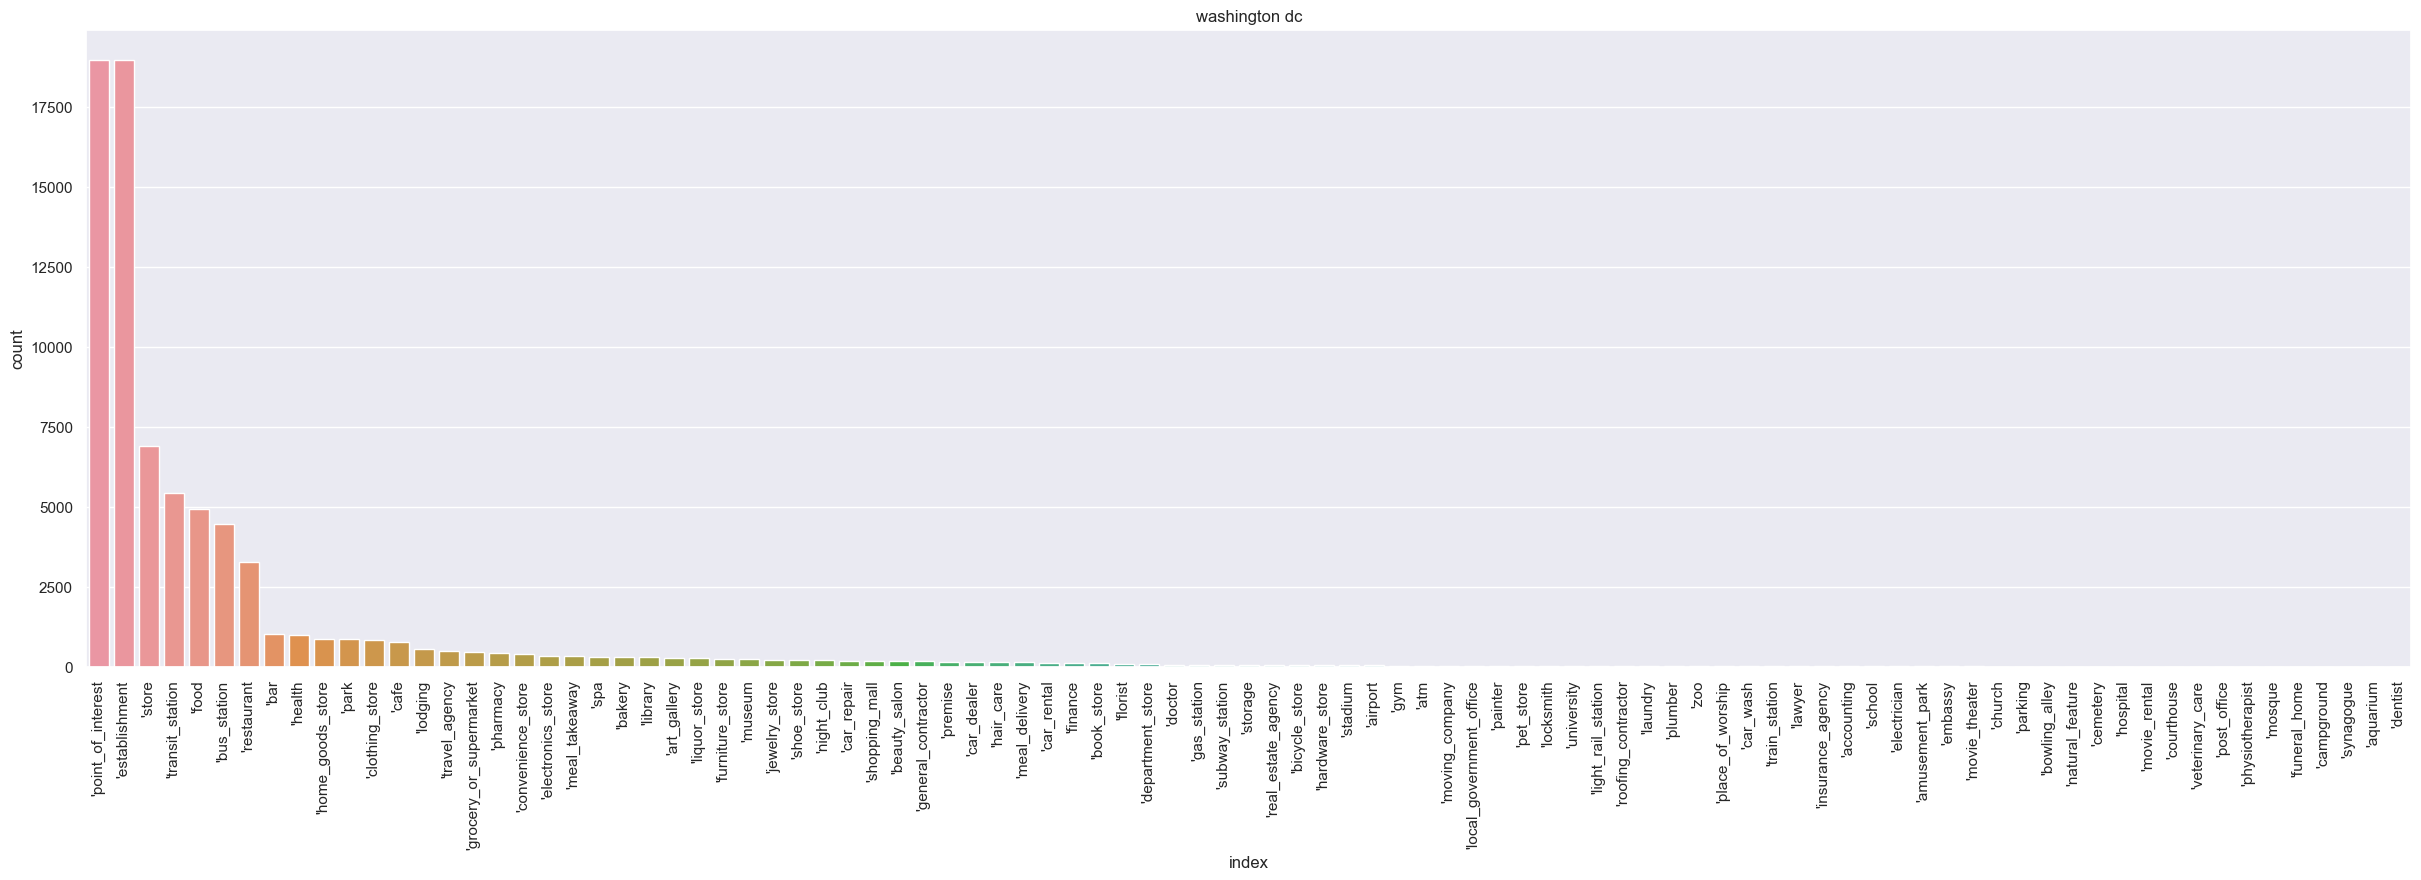

                 index   count metropolitan
0   'point_of_interest  130588          NYC
1       'establishment  130588          NYC
2               'store   74299          NYC
3                'food   40025          NYC
4          'restaurant   22710          NYC
..                 ...     ...          ...
88       'funeral_home       1           dc
89         'campground       1           dc
90          'synagogue       1           dc
91           'aquarium       1           dc
92            'dentist       1           dc

[469 rows x 3 columns]
            city    rating
0         boston  4.100188
1        chicago  4.091885
2         denver  4.011665
3  new york city  4.064239
4  washington dc  4.001884
  metropolitan       price
0          NYC  145.308100
1       boston  173.925802
2      chicago  136.210486
3           dc  247.162835
4       denver  133.850699


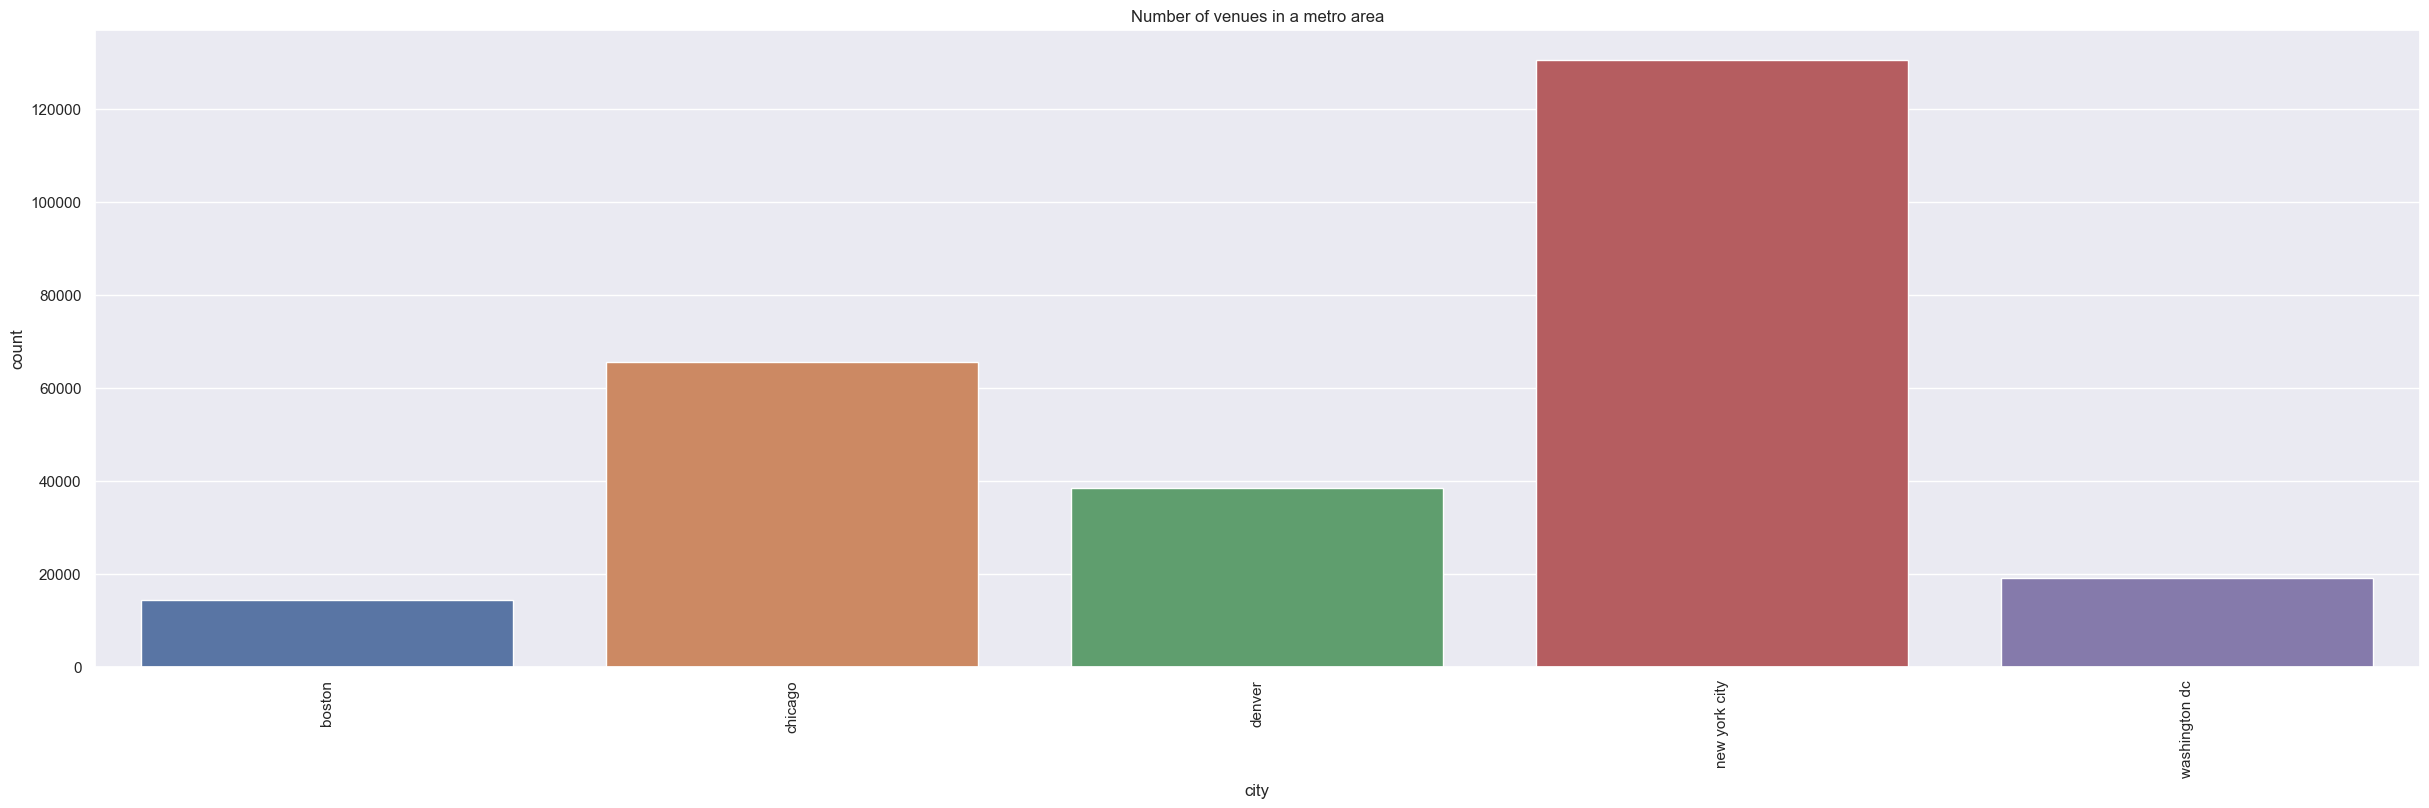

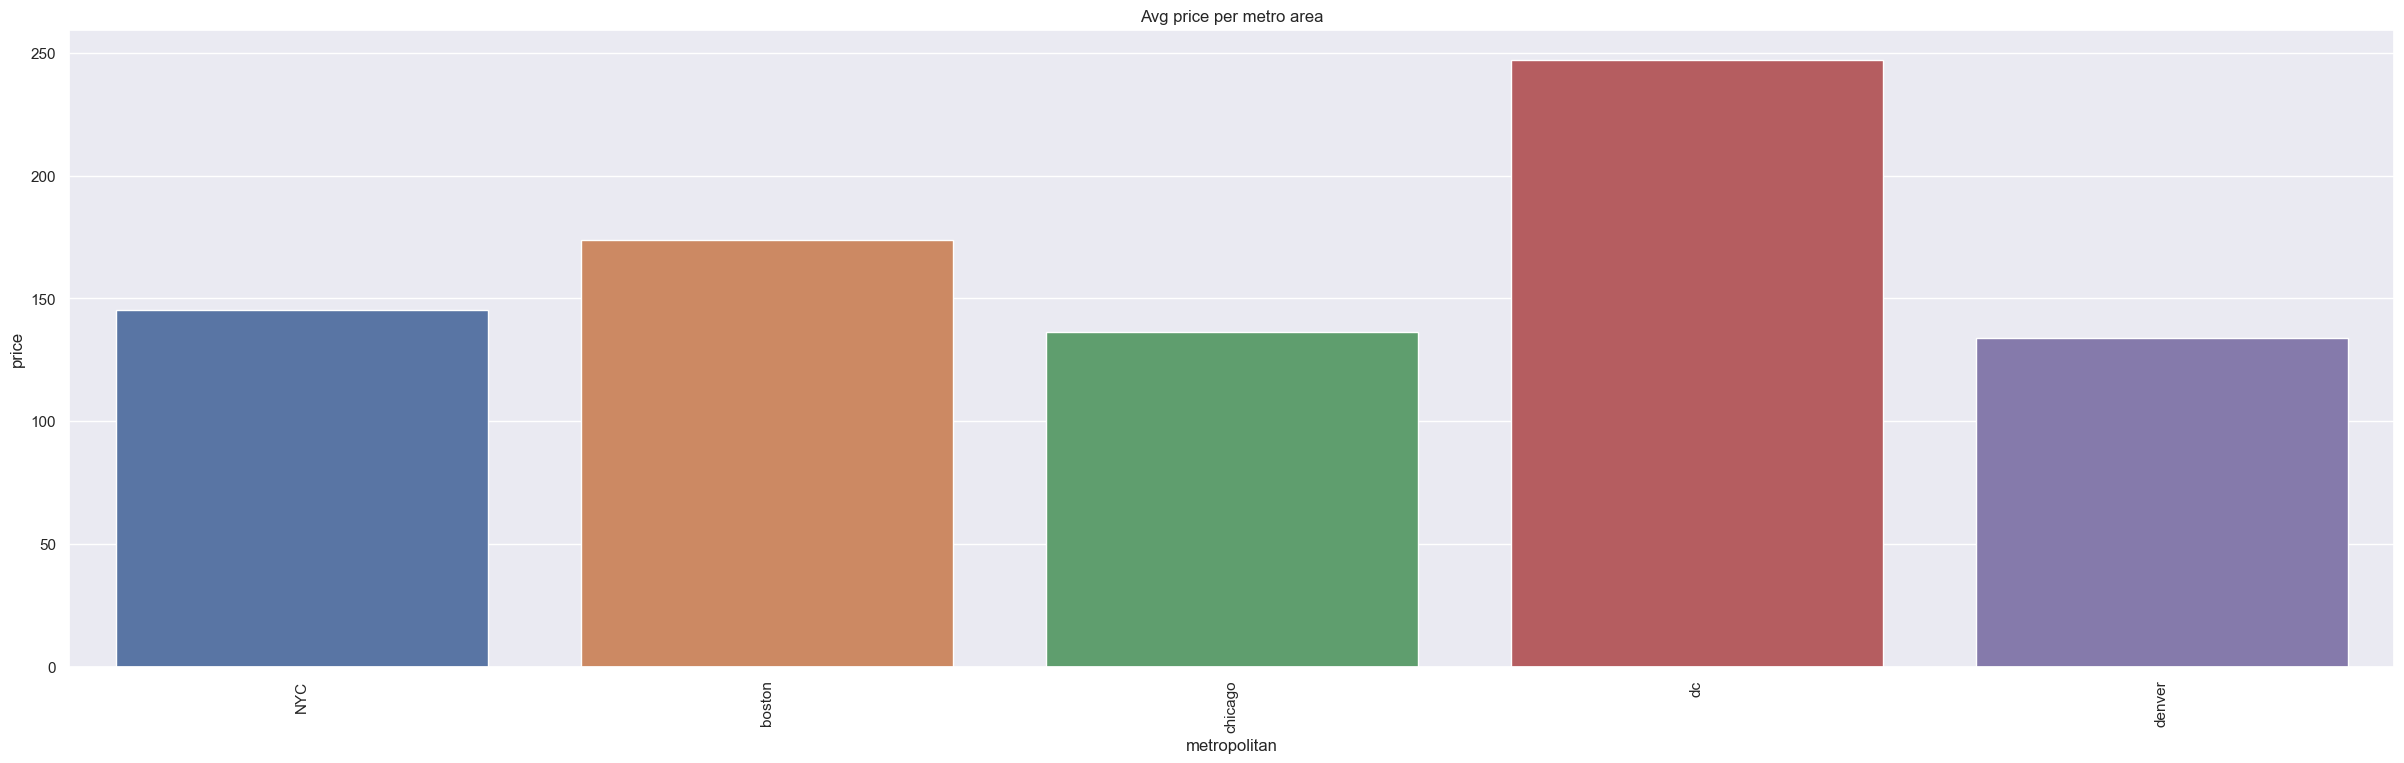

In [282]:
import math
import ast
import nltk

long1 = venuesDF['longitude'].tolist()
lat1 = venuesDF['latitude'].tolist()

nltk.download('punkt')

venuesCountDF = venuesDF.groupby(by="city").count()
venuesCountDF = venuesCountDF[['id']]
venuesCountDF = venuesCountDF.rename(columns={'id':'count'}).reset_index()

listingsDF4 = pd.read_csv("datasets/listings.csv")
listingsCountDF = listingsDF4[['price',"metropolitan"]]
listingsCountDF = listingsCountDF.groupby("metropolitan").mean().reset_index()
print(listingsCountDF)

venuesRatingDF = venuesDF.groupby(by="city").mean()
venuesRatingDF = venuesRatingDF[['rating']]
venuesRatingDF = venuesRatingDF.reset_index()

metroAreas = {"new york city":"NYC","denver":"denver","chicago":"chicago","boston":"boston","washington dc":"dc"}
invalidtokens = ["[","'",",","]"]

sns.set(rc={'figure.figsize':(30,8.27)})
plt.pyplot.xticks(rotation=90)

numOfVenueTypeEachCity = pd.DataFrame()

words3 = []

for i in metroAreas.keys():
    cityString = i
    currentVenuesDF = venuesDF[venuesDF["city"] == i]
    currentVenueString = currentVenuesDF["types"]
    currentVenueString = currentVenueString.tolist()
    words = []
    for i in range(len(currentVenueString)):
            sentences = nltk.sent_tokenize(currentVenueString[i])
            for sentence in sentences:
                words+=nltk.word_tokenize(sentence)
    words2 = words
    words = []
    for w in words2:
        if w not in invalidtokens:
            words.append(w)
    words3+=words
    words = pd.Series(words)
    words = words.value_counts().reset_index()
    words = words.rename(columns={0:"count"})
    words["metropolitan"] = metroAreas[cityString]
    numOfVenueTypeEachCity = numOfVenueTypeEachCity.append(words)
    aGraph = sns.barplot(data=words,x="index",y="count").set(title=cityString)
    plt.pyplot.xticks(rotation=90)
    plt.pyplot.show()

print(numOfVenueTypeEachCity)

print(venuesRatingDF)
print(listingsCountDF)

sns.barplot(data=venuesCountDF,x="city",y="count").set(title="Number of venues in a metro area")
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()
sns.barplot(data=listingsCountDF,x="metropolitan",y="price").set(title="Avg price per metro area")
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()

In [283]:
listingsDF2 = listingsDF.groupby(by=["metropolitan"]).mean().reset_index()
venuesCountDF = venuesCountDF.rename(columns={"city":"metropolitan"})
venuesRatingDF = venuesRatingDF.rename(columns={"city":"metropolitan"})
venuesCountDF = venuesCountDF.replace({"metropolitan":metroAreas})
venuesRatingDF = venuesRatingDF.replace({"metropolitan":metroAreas})
listingsDF2 = listingsDF2.merge(venuesCountDF,on=['metropolitan'])
listingsDF2 = listingsDF2.merge(venuesRatingDF,on=['metropolitan'])
print("Pearson Correlation Coefficient for total venue count: " + str(listingsDF2['price'].corr(listingsDF2['count'])))
print("Pearson Correlation Coefficient for avg venue rating: " + str(listingsDF2['price'].corr(listingsDF2['rating'])))
words3 = pd.Series(words3).unique().tolist()
for i in words3:
    currentVenueDF = numOfVenueTypeEachCity[numOfVenueTypeEachCity["index"] == i]
    listingsDFx = listingsDF2.merge(currentVenueDF,on=['metropolitan'])
    print("Pearson Correlation Coefficient for " + i + ": " + str(listingsDFx['price'].corr(listingsDFx['count_y'])))



Pearson Correlation Coefficient for total venue count: -0.6451645310935286
Pearson Correlation Coefficient for avg venue rating: -0.8317554806551437
Pearson Correlation Coefficient for 'restaurant: -0.4905230730940932
Pearson Correlation Coefficient for 'food: -0.47290261889991353
Pearson Correlation Coefficient for 'point_of_interest: -0.6451645310935286
Pearson Correlation Coefficient for 'establishment: -0.6451645310935286
Pearson Correlation Coefficient for 'bar: -0.5038842880102928
Pearson Correlation Coefficient for 'cafe: -0.47448478600872884
Pearson Correlation Coefficient for 'store: -0.47288230224295835
Pearson Correlation Coefficient for 'meal_delivery: -0.5220412936296877
Pearson Correlation Coefficient for 'grocery_or_supermarket: -0.4460257754403304
Pearson Correlation Coefficient for 'bakery: -0.4809683654416873
Pearson Correlation Coefficient for 'meal_takeaway: -0.4719016019808568
Pearson Correlation Coefficient for 'night_club: -0.4803437442783541
Pearson Correlation 

c:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
c:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
c:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
c:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees 

Correlation is 1:1 for political

## *Analyzing real_estate.csv*

In [299]:
realEstateDF = pd.read_csv("datasets/real_estate.csv.gz",compression='gzip')

for i in range(1996,2015):
    realEstateDF = realEstateDF.drop(list(realEstateDF.filter(regex=str(i))),axis=1)
print(realEstateDF)

       type  zipcode             city state            metro        county  \
0      ZHVI    10025         New York    NY         New York      New York   
1      ZHVI    60657          Chicago    IL          Chicago          Cook   
2      ZHVI    60614          Chicago    IL          Chicago          Cook   
3      ZHVI    79936          El Paso    TX          El Paso       El Paso   
4      ZHVI    60640          Chicago    IL          Chicago          Cook   
...     ...      ...              ...   ...              ...           ...   
29106   ZRI    12720           Bethel    NY              NaN      Sullivan   
29107   ZRI     1338  Shelburne Falls    MA  Greenfield Town      Franklin   
29108   ZRI    21405        Annapolis    MD        Baltimore  Anne Arundel   
29109   ZRI    85220  Apache Junction    AZ          Phoenix         Pinal   
29110   ZRI    89595             Reno    NV             Reno        Washoe   

       size_rank  2015-01  2015-02  2015-03  ...  2016-09  2016

## *Coming to conclusions*

In [300]:
listingsDF2 = listingsDF3.merge(demographicsDF2,on=['city'])
listingsDF2 = listingsDF2.merge(demographicsDF4,on=['city'])

print("Pearson Correlation Coefficient for median_household_income: " + str(listingsDF2['price'].corr(listingsDF2['median_household_income'])))
print("Pearson Correlation Coefficient for mean_household_income: " + str(listingsDF2['price'].corr(listingsDF2['mean_household_income'])))
print("Pearson Correlation Coefficient for bathrooms: " + str(listingsDF2['price'].corr(listingsDF2['bathrooms'])))
print("Pearson Correlation Coefficient for bedrooms: " + str(listingsDF2['price'].corr(listingsDF2['bedrooms'])))
print("Pearson Correlation Coefficient for beds: " + str(listingsDF2['price'].corr(listingsDF2['beds'])))
print(listingsDF2)
#print(listingsDF2[listingsDF2['city'].str.contains("chevy chase")])


Pearson Correlation Coefficient for median_household_income: 0.2958165283435775
Pearson Correlation Coefficient for mean_household_income: 0.48759954857855536
Pearson Correlation Coefficient for bathrooms: 0.6530619198593104
Pearson Correlation Coefficient for bedrooms: 0.735879860493186
Pearson Correlation Coefficient for beds: 0.6395330110718719
                city  accommodates  availability_30  bathrooms  bedrooms  \
0    capitol heights      2.545455        26.090909        1.0  1.090909   
1     evergreen park      3.000000        18.000000        1.0  1.000000   
2            bedstuy      1.000000         3.000000        1.0  1.000000   
3     longislandcity      1.000000         0.000000        1.0  1.000000   
4       calumet park      6.000000        23.000000        2.0  1.000000   
..               ...           ...              ...        ...       ...   
111  chicago heights      8.000000        30.000000        1.5  5.000000   
112        south end      6.000000        

NYC more expensive than other cities